# ALGORITHME DES K PLUS PROCHES VOISINS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## L'algorithme des k plus proches voisins est un algorithme dit d’apprentissage automatique qui permet à un programme d’apprendre à classer des « objets » en utilisant un jeu de données pour qu’il y trouve des similarités. Il s’agit d’un algorithme simple de « machine learning » un sujet très en vogue à l’heure actuelle dans le domaine de l’informatique.
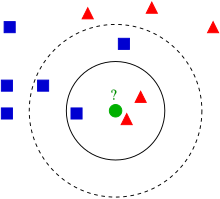

Comment classer le point vert ? Si k = 3 (cercle en ligne pleine) il est classé comme un triangle car il y a deux triangles et seulement un carré dans le cercle considéré. Si k = 5 (cercle en ligne pointillée) il est classé comme un carré (3 carrés face à deux triangles dans le cercle externe).

## Principe de l’apprentissage supervisé

On se base souvent sur l’utilisation de données annotées que l’on fournit à l’ordinateur pour qu’il y trouve des similarités.
C’est ce qui est appelé l’__apprentissage supervisé__.

<u>**Exemple**</u> :

On peut fournir à un programme une grande quantité d’écritures de chiffres.<br>

Le programme va lire toutes les données, et grâce à des algorithmes plus ou moins évolués, le programme va trouver les points communs entre les chiffres représentant le même nombre.

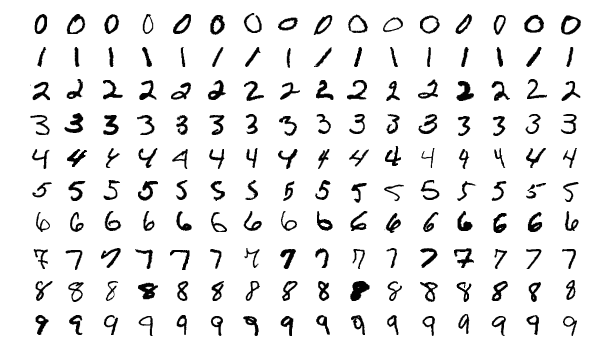

Le jeu de données du MNIST est un exemple de jeu d'entrainement et de tests des algorithmes de reconnaissance de chiffres. <br>
©  CC BY-SA 4.0 via Wikimedia Commons

Ensuite, on peut donner au programme une image non annotée, et il nous dira s’il s’agit d’un 1, d’un 6 ou d’un 8… <br>

C’est un système qui est utilisé depuis des années pour la lecture des codes postaux sur les lettres avec une efficacité supérieure à 99%.

<iframe src="https://hmalherbe.fr/thalesm/gestclasse/documents/Premiere_NSI/Animations/k_plus_proches_voisins/k_plus_proches_voisins.html" title="description"></iframe>

## Principe l’algorithme des k plus proches voisins

On dispose d’une collection de données annotées, et on veut savoir à quelle catégorie appartient un nouvel échantillon. Il s’agit d’un problème de **classification**.

Consultez cette animation qui illustre l'algorithme des k plus proches voisins :
https://hmalherbe.fr/thalesm/gestclasse/documents/Premiere_NSI/Animations/k_plus_proches_voisins/k_plus_proches_voisins.html

Nous allons travailler sur un tableau de données des joueurs de rugby du top-14 de la saison 2019-2020 issues de la page de la ligue nationale de rugby :

[fichier csv](https://drive.google.com/file/d/1TwwFmnxO8hWhMq451IZr1YN5cFSrdaty/view?usp=sharing)

Le travail consistera à attribuer un poste sur le terrain à un joueur à partir de son poids et de sa taille en utilisant l’algorithme des k plus proches voisins:

* avant ;
* deuxième ligne,
* troisième ligne,
* demi ;
* trois-quart ;
* arrière


## Lecture des données

On commence par lire les données du fichier sous la forme d’un tableau de tableau.

In [ ]:
import csv
NOM_FICHIER_CSV = "JoueursTop14.csv"
NOM_FICHIER_CSV = "/content/drive/MyDrive/Colab Notebooks/NSI/Première/knn/JoueursTop14.csv"

def extractionDonnees(nom_fichier):
    f = open(nom_fichier, encoding="utf8")
    lignes = csv.reader(f,delimiter=";")
    tabJoueurs = []
    return [ligne for ligne in lignes][1:]

donnees = extractionDonnees(NOM_FICHIER_CSV)
for d in donnees:
  print(d)
#

['Agen', 'Anton PEIKRISHVILI', 'Avant', '18/09/1987', '183', '122']
['Agen', 'Dave RYAN', 'Avant', '21/04/1986', '183', '116']
['Agen', 'Giorgi TETRASHVILI', 'Avant', '31/08/1993', '177', '112']
['Agen', 'Kamaliele TUFELE', 'Avant', '11/10/1995', '182', '123']
['Agen', 'Malino VANAÏ', 'Avant', '04/05/1993', '183', '119']
['Agen', 'Morgan PHÉLIPPONNEAU', 'Avant', '05/09/1989', '185', '106']
['Agen', 'Walter DESMAISON', 'Avant', '18/10/1991', '188', '119']
['Agen', 'Clément MARTINEZ', 'Avant', '14/03/1996', '181', '105']
['Agen', 'Marc BARTHOMEUF', 'Avant', '19/07/1991', '174', '100']
['Agen', 'Paula NGAUAMO', 'Avant', '19/02/1990', '182', '117']
['Agen', 'Adrian MOTOC', '2ème ligne', '11/07/1996', '197', '108']
['Agen', 'Andrés ZAFRA', '2ème ligne', '26/03/1996', '197', '116']
['Agen', 'Mickaël DE MARCO', '2ème ligne', '22/04/1989', '195', '134']
['Agen', 'Pierce PHILLIPS', '2ème ligne', '06/10/1992', '203', '119']
['Agen', 'Tom MURDAY', '2ème ligne', '27/04/1989', '200', '114']
['Agen'

##  Observation des postes des joueurs sur un graphique

Compléter le code de la fonction <code>extraireEquipe(donnees,equipe)</code> qui extrait les données d'une équipe passée en paramètre.
```



In [ ]:
def extraireEquipe(donnees,nom_equipe):
    pass

La fonction <code>representation(nom_equipe,donnees)</code> permet de représenter graphiquement les postes des joeeurs avec un nuage de points les données d'une équipe passée en paramètre avec sur l'axe des abscisses la taille des joueurs et sur l'axe des ordonnées le poids des joueurs.

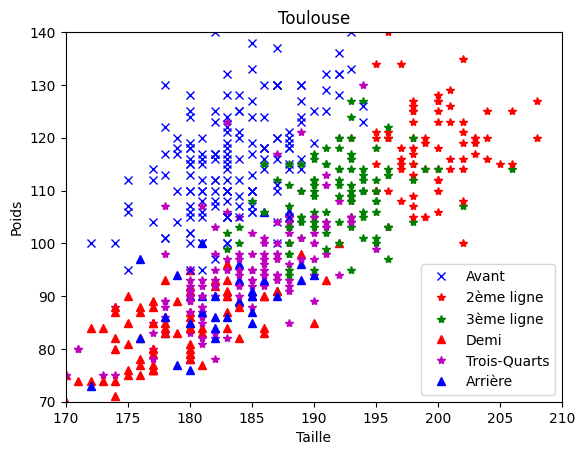

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
from random import shuffle

def representation(nom_equipe,donnees):
    plt.axis([170, 210, 70, 140])
    plt.ylabel("Poids")
    plt.xlabel("Taille")
    plt.title(nom_equipe)
    labels = []
    for donnee in donnees:
        if donnee[2] == "Avant":
            marque = "bx"
        elif donnee[2] == "2ème ligne":
            marque = "*r"
        elif donnee[2] == "3ème ligne":
            marque = "*g"
        elif donnee[2] == "Demi":
            marque = "^r"
        elif donnee[2] == "Trois-Quarts":
            marque = "*m"
        elif donnee[2] == "Arrière":
            marque = "^b"
        else:
            marque = "^b"
        if donnee[2] in labels:
            plt.plot(int(donnee[4]), int(donnee[5]), marque)
        else:
            labels.append(donnee[2])
            plt.plot(int(donnee[4]), int(donnee[5]), marque,label = donnee[2])
    plt.legend()
    plt.show()


donnees_equipe = extraireEquipe(donnees,"Toulouse")

representation("Toutes équipes",donnees)

## Séparation des données pour le test et pour l'entrainement
On divise les donnees en deux parties :


*   une pour l'entrainement (80%)
*   une autre pour les tests (20%)



In [ ]:
nb_entrainements = int(len(donnees) * 0.85)
shuffle(donnees)
donnees_entrainement = donnees[:nb_entrainements]
donnees_test = donnees[nb_entrainements:]

## Implémentation de la fonction distance

On mesure la distance Euclidienne entre deux joueurs avec la fonction <code>def distance(j1, j2)</code>.
avec :

*   <code>j1 = (t1,p1)</code> t1 : taille en cm et p1 poids en kg du joueur 1
*   <code>j2 = (t2,p2)</code> t2 : taille en cm et p2 poids en kg du joueur 1


Complétez le code de cette fonction.


In [ ]:
from math import sqrt


def distance(j1,j2):
    pass

## Algorithme du plus proche voisin
On commence par écrire une fonction <code>plus_proche(i)</code>qui recherche dans les données d’entrainement le joueur le plus proche du joueur de test d’indice i.
Complétez le code de cette fonction.

In [ ]:
def plus_proche(i):
    "Renvoie le poste du plus proche voisin dans train du joueur de test d'indice i"
    joueur_test = donnees_test[i]
    # on initialise l'indice et la distance minimum sur
    # la première donnée d'entraînement
    j_min = 0
    d_min = distance((joueur_test[5],joueur_test[6]),(donnees_entrainement[0][5],donnees_entrainement[0][6]))
    # on recherche le joueur avec la distance minimum
    # dans les données d'entrainement
    for j in range(len(train)):
         d = distance((joueur_test[5],joueur_test[6]),(donnees_entrainement[j][5],donnees_entrainement[j][6]))
        ...

    return ...





## Calcul du taux d’erreur
Puisque l’algorithme commet des erreurs regardons combien il en fait et quel pourcentage cela représente.<br>
Complétez le code de la fonction <code>taux_erreur()</code>.

In [ ]:
def taux_erreur():
    erreur = 0
    for i in range(len(donnees_test)):
        ...
        if poste_predit != poste_reel:
            erreur = erreur + 1
    return erreur/......


print("taux erreur",taux_erreur())

taux erreur 0.35555555555555557


## Algorithme des k plus proches voisins
Plutôt que de regarder le plus proche voisin, nous allons regarder les k plus proches voisins du joueur de test dans les données d’entrainement.

Pour cela nous allons créer une liste des postes des plus proches voisins, puis grâce à la fonction suivante, nous en déduirons le poste le plus probable d’après ces voisins.

In [ ]:
def occurence_max(tab):
    """
    Renvoie la valeur qui a le plus d'occurences dans un tableau
    """
    dico = {k: 0 for k in tab}
    for k in tab:
        dico[k] += 1

    maxi, k_max = 0 , 0
    for k, v in dico.items():
        if v > maxi:
            maxi, k_max = v , k
    return k_max

assert occurence_max(["Avant", "Avant", "Arrière"]) == "Avant"
assert occurence_max(["Avant", "Arrière", "Arrière"]) == "Arrière"

In [ ]:
def classification(k,donnees,taille,poids):
    plus_proches = []
    for donnee in donnees:
        d = distance((int(donnee[4]),int(donnee[5])),(taille,poids))
        plus_proches.append((d,donnee[2]))
    plus_proches =sorted(plus_proches,key= lambda x: x[0],reverse=False)
    plus_proches =plus_proches[:k]
    plus_proches = [pp[1] for pp in plus_proches]
    return occurence_max(plus_proches)



<u>Commentaires sur la fonction <code>classification</code></u> :


*   On construit une liste <code>plus_proches</code> constituée de triplets de la forme <code>(distance, poste)</code> ;
*   Cette liste est triée à la ligne 7 par ordre de distance croissante ;
*  A la ligne 7, on conserve les k plus proches voisins (les k dont la distance est la plus petite)
* A la ligne 8, on cree une liste des k postes les plus proches
* La ligne 9 permet de retourner le poste majoritaire parmi les k postes.


### Taux d'erreur avec les k plus proches voisins

In [ ]:
def taux_erreur_knn(k):
    erreur = 0
    for i in range(len(donnees_test)):
        taille = int(donnees_test[i][4])
        poids = int(donnees_test[i][5])
        poste_predit = classification(k,donnees_entrainement,taille,poids)
        poste_reel = donnees_test[i][2]
        if poste_predit != poste_reel:
            erreur = erreur + 1
    return erreur/len(donnees_test)

k = 7
print(f"taux erreur knn avec k = {k} : {taux_erreur_knn(k)}")

taux erreur knn avec k = 7 : 0.3


### Recherche de la meilleure valeur de k
Nous allons tracer le taux d’erreur en fonction du nombre k de voisins choisis pour trouver la meilleure valeur de k possible.

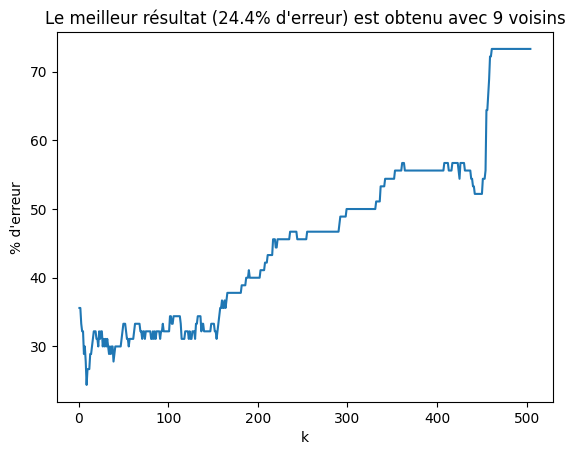

In [ ]:
xs = []
ys = []
for k in range(1, len(donnees_entrainement)):
    taux_erreur = taux_erreur_knn(k)
    xs.append(k)
    ys.append(round(taux_erreur*100, 1))

plt.plot(xs, ys)
plt.xlabel('k')
plt.ylabel("% d'erreur")
plt.title(f"Le meilleur résultat ({min(ys)}% d'erreur) est obtenu avec {xs[ys.index(min(ys))]} voisins")
plt.show()